In [1]:
import pandas as pd

# Verander 'train.csv' naar het pad waar je jouw CSV-bestand hebt opgeslagen
file_path = 'data/competition-train.csv'

# Laad de dataset in een pandas DataFrame
data = pd.read_csv(file_path)

# Controleer op ontbrekende waarden
missing_values = data.isnull().sum()

# Toon de ontbrekende waarden
print("Ontbrekende waarden per kolom:")
print(missing_values)


Ontbrekende waarden per kolom:
Individu-ID           0
geslacht              0
leeftijd              0
opleidingsniveau      0
cigaretten_per_dag    0
slaapscore            0
hypertensie           0
hartinfarct           0
diabetes              0
nierziekte            0
cholesterol           0
bovendruk             0
onderdruk             0
BMI                   0
hartslag              0
glucose               0
prognose10jaar        0
dtype: int64


In [182]:
missing_values = data.isna().sum()

# Toon de ontbrekende waarden
print("Ontbrekende waarden per kolom:")
print(missing_values)

Ontbrekende waarden per kolom:
Individu-ID           0
geslacht              0
leeftijd              0
opleidingsniveau      0
cigaretten_per_dag    0
slaapscore            0
hypertensie           0
hartinfarct           0
diabetes              0
nierziekte            0
cholesterol           0
bovendruk             0
onderdruk             0
BMI                   0
hartslag              0
glucose               0
prognose10jaar        0
dtype: int64


In [183]:
data.describe

<bound method NDFrame.describe of      Individu-ID geslacht  leeftijd opleidingsniveau cigaretten_per_dag  \
0        #203910        V        39                1                 30   
1        #248527        M        60                4                  0   
2        #302622        M        42                2                  0   
3        #142075        M        41                1                 20   
4        #162498        V        50                3                  0   
...          ...      ...       ...              ...                ...   
3235     #170800        V        38                1                 30   
3236     #313110        V        32                3                 15   
3237     #226915        V        46                3                  0   
3238     #213677        V        58                1                  0   
3239     #165628        V        68                1                  0   

      slaapscore hypertensie hartinfarct diabetes nierziekte chol

In [184]:
# Vervang '-' door 0 en '+' door 1 in de relevante kolommen
columns_to_replace = ['hypertensie', 'hartinfarct', 'diabetes', 'nierziekte']

for column in columns_to_replace:
    data[column] = data[column].replace({'-': 0, '+': 1})

# Bekijk de gewijzigde dataset
print(data.head())



  Individu-ID geslacht  leeftijd opleidingsniveau cigaretten_per_dag  \
0     #203910        V        39                1                 30   
1     #248527        M        60                4                  0   
2     #302622        M        42                2                  0   
3     #142075        M        41                1                 20   
4     #162498        V        50                3                  0   

   slaapscore  hypertensie  hartinfarct  diabetes nierziekte cholesterol  \
0          62            0            0         0          0           ?   
1          39            0            0         0          0         250   
2          41            0            0         0          0         274   
3          68            0            0         0          0         234   
4          38            0            0         0          0         309   

   bovendruk  onderdruk BMI hartslag glucose prognose10jaar  
0      122.5       80.0  18      105       ?    

/tmp/ipykernel_58014/2743456556.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace({'-': 0, '+': 1})


In [185]:
# Bekijk de datatypes van elke kolom
data = data.drop('Individu-ID', axis=1)
print(data.dtypes)


geslacht               object
leeftijd                int64
opleidingsniveau       object
cigaretten_per_dag     object
slaapscore              int64
hypertensie             int64
hartinfarct             int64
diabetes                int64
nierziekte             object
cholesterol            object
bovendruk             float64
onderdruk             float64
BMI                    object
hartslag               object
glucose                object
prognose10jaar         object
dtype: object


In [186]:
# Vervang geslacht 'm' door 1 en 'f' door 0
data['geslacht'] = data['geslacht'].replace({'M': 1, 'V': 0})
data['prognose10jaar'] = data['prognose10jaar'].replace({'CHD+': 1, 'CHD-': 0})
# Bekijk de gewijzigde dataset
print(data.head())


   geslacht  leeftijd opleidingsniveau cigaretten_per_dag  slaapscore  \
0         0        39                1                 30          62   
1         1        60                4                  0          39   
2         1        42                2                  0          41   
3         1        41                1                 20          68   
4         0        50                3                  0          38   

   hypertensie  hartinfarct  diabetes nierziekte cholesterol  bovendruk  \
0            0            0         0          0           ?      122.5   
1            0            0         0          0         250      133.0   
2            0            0         0          0         274      121.0   
3            0            0         0          0         234      103.0   
4            0            0         0          0         309      136.0   

   onderdruk BMI hartslag glucose  prognose10jaar  
0       80.0  18      105       ?               0  
1     

/tmp/ipykernel_58014/141914231.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['geslacht'] = data['geslacht'].replace({'M': 1, 'V': 0})
/tmp/ipykernel_58014/141914231.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['prognose10jaar'] = data['prognose10jaar'].replace({'CHD+': 1, 'CHD-': 0})


In [187]:
from sklearn.preprocessing import LabelEncoder

# Maak een LabelEncoder object
label_encoder = LabelEncoder()

# Pas labelencodering toe op 'opleidingsniveau'
data['opleidingsniveau'] = label_encoder.fit_transform(data['opleidingsniveau'])

# Bekijk de gewijzigde dataset
print(data.head())

   geslacht  leeftijd  opleidingsniveau cigaretten_per_dag  slaapscore  \
0         0        39                 0                 30          62   
1         1        60                 3                  0          39   
2         1        42                 1                  0          41   
3         1        41                 0                 20          68   
4         0        50                 2                  0          38   

   hypertensie  hartinfarct  diabetes nierziekte cholesterol  bovendruk  \
0            0            0         0          0           ?      122.5   
1            0            0         0          0         250      133.0   
2            0            0         0          0         274      121.0   
3            0            0         0          0         234      103.0   
4            0            0         0          0         309      136.0   

   onderdruk BMI hartslag glucose  prognose10jaar  
0       80.0  18      105       ?               0  


In [188]:
import numpy as np

# Vervang '?' door NaN in de hele dataset
data.replace('?', np.nan, inplace=True)

# Converteer de gehele dataset naar numerieke waarden
data = data.apply(pd.to_numeric)

# Bereken de gemiddelde waarde van elke kolom
column_means = data.mean()

# Vervang NaN-waarden door de gemiddelde waarden per kolom
data.fillna(column_means, inplace=True)

# Bekijk de gewijzigde dataset
print(data.head())


   geslacht  leeftijd  opleidingsniveau  cigaretten_per_dag  slaapscore  \
0         0        39                 0                30.0          62   
1         1        60                 3                 0.0          39   
2         1        42                 1                 0.0          41   
3         1        41                 0                20.0          68   
4         0        50                 2                 0.0          38   

   hypertensie  hartinfarct  diabetes  nierziekte  cholesterol  bovendruk  \
0            0            0         0         0.0   236.465604      122.5   
1            0            0         0         0.0   250.000000      133.0   
2            0            0         0         0.0   274.000000      121.0   
3            0            0         0         0.0   234.000000      103.0   
4            0            0         0         0.0   309.000000      136.0   

   onderdruk   BMI  hartslag    glucose  prognose10jaar  
0       80.0  18.0     105.0

/tmp/ipykernel_58014/360928083.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)


In [189]:
# Toon statistische informatie over alle numerieke kolommen
print(data.describe())


          geslacht     leeftijd  opleidingsniveau  cigaretten_per_dag  \
count  3240.000000  3240.000000       3240.000000         3240.000000   
mean      0.426543    49.517284          1.048765            9.027338   
std       0.494651     8.787376          1.107427           11.987922   
min       0.000000    29.000000          0.000000            0.000000   
25%       0.000000    42.000000          0.000000            0.000000   
50%       0.000000    49.000000          1.000000            0.000000   
75%       1.000000    56.000000          2.000000           20.000000   
max       1.000000    71.000000          4.000000           70.000000   

        slaapscore  hypertensie  hartinfarct     diabetes   nierziekte  \
count  3240.000000  3240.000000  3240.000000  3240.000000  3240.000000   
mean     55.410802     0.308025     0.006481     0.024383     0.034963   
std      18.015912     0.461748     0.080259     0.154258     0.183487   
min       4.000000     0.000000     0.000000  

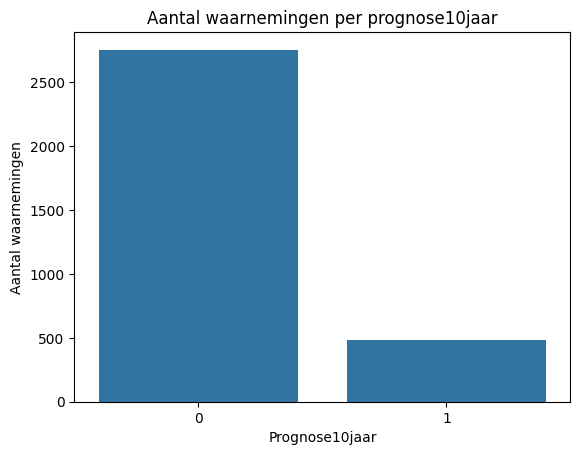

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Krijg de tellingen van '1' en '0' in de kolom 'prognose10jaar'
counts = data['prognose10jaar'].value_counts()

# Maak een barplot
sns.barplot(x=counts.index, y=counts.values)

# Stel de titel en labels in
plt.title('Aantal waarnemingen per prognose10jaar')
plt.xlabel('Prognose10jaar')
plt.ylabel('Aantal waarnemingen')

# Toon de plot
plt.show()


In [191]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = data["prognose10jaar"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(data.index)

from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in data.groupby("prognose10jaar")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in data.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


/tmp/ipykernel_58014/576192271.py:15: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  F, p = stats.f_oneway(*groupdata)


,$F$,$p$,$\eta^2$
geslacht,24.088015,9.657836e-07,0.007384
leeftijd,169.815094,7.161925e-38,0.049831
opleidingsniveau,7.287400,6.980078e-03,0.002246
cigaretten_per_dag,7.928837,4.894743e-03,0.002443
slaapscore,308.621759,4.607836e-66,0.087019
hypertensie,116.876089,8.711426e-27,0.034838
hartinfarct,17.788742,2.536023e-05,0.005464
diabetes,26.871794,2.307414e-07,0.008231
nierziekte,1.197801,2.738430e-01,0.000370
cholesterol,29.802148,5.145290e-08,0.009120


In [192]:
data

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,0,39,0,30.0,62,0,0,0,0.0,236.465604,122.5,80.0,18.0,105.0,81.816604,0
1,1,60,3,0.0,39,0,0,0,0.0,250.000000,133.0,89.5,27.0,90.0,81.816604,0
2,1,42,1,0.0,41,0,0,0,0.0,274.000000,121.0,61.5,25.0,80.0,76.000000,0
3,1,41,0,20.0,68,0,0,0,0.0,234.000000,103.0,71.0,21.0,68.0,82.000000,1
4,0,50,2,0.0,38,0,0,0,0.0,309.000000,136.0,90.0,26.0,70.0,75.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0,38,0,30.0,71,0,0,0,0.0,164.000000,113.0,68.0,25.0,70.0,75.000000,0
3236,0,32,2,15.0,64,0,0,0,0.0,199.000000,116.0,81.0,21.0,75.0,93.000000,0
3237,0,46,2,0.0,18,1,0,0,0.0,237.000000,196.0,120.0,31.0,58.0,60.000000,1
3238,0,58,0,0.0,78,0,0,0,0.0,205.000000,142.5,74.5,25.0,85.0,83.000000,0


In [193]:
from sklearn.preprocessing import StandardScaler

temp_data = data.drop('prognose10jaar', axis=1)
# Create an instance of StandardScaler and use it to scale numerical features in the 'stroke' dataset
scaled = StandardScaler().fit_transform(temp_data.select_dtypes(include='number'))


In [194]:
import numpy as np

# Create a DataFrame to display mean and standard deviation for each feature after scaling
statistics_df = pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=data.columns[0:15])
statistics_df


,mean,std
geslacht,1.052656e-16,1.0
leeftijd,5.043976e-17,1.0
opleidingsniveau,5.592234e-17,1.0
cigaretten_per_dag,-8.443178e-17,1.0
slaapscore,-8.772133e-18,1.0
hypertensie,7.346661e-17,1.0
hartinfarct,3.070246e-17,1.0
diabetes,-1.535123e-17,1.0
nierziekte,6.359796e-17,1.0
cholesterol,-3.640435e-16,1.0


In [195]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA().fit(scaled)

# Transform the scaled data using PCA
components = pca.transform(scaled)

# Iterate over the first 4 principal components
for n in range(4):
    # Create attribute names for the principal components
    attribute = f"PC-{n+1}"
    
    # Add new columns to the 'stroke' DataFrame with the principal component values
    data[attribute] = components[:, n]
    
    # Perform ANOVA on the newly added principal component
    anova[attribute] = anova_stats(attribute)


In [196]:
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

,$F$,$p$,$\eta^2$
geslacht,24.088015,9.657836e-07,0.007384
leeftijd,169.815094,7.161925e-38,0.049831
opleidingsniveau,7.287400,6.980078e-03,0.002246
cigaretten_per_dag,7.928837,4.894743e-03,0.002443
slaapscore,308.621759,4.607836e-66,0.087019
hypertensie,116.876089,8.711426e-27,0.034838
hartinfarct,17.788742,2.536023e-05,0.005464
diabetes,26.871794,2.307414e-07,0.008231
nierziekte,1.197801,2.738430e-01,0.000370
cholesterol,29.802148,5.145290e-08,0.009120


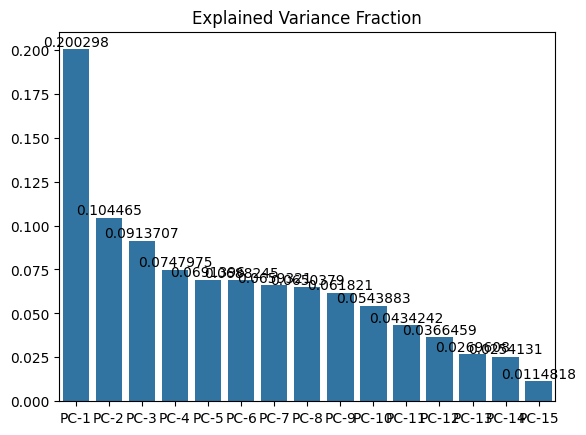

In [197]:
# Create a bar plot to visualize the explained variance ratio for each principal component
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(15)], y=pca.explained_variance_ratio_)

# Add labels to the bars showing the explained variance ratio
axs.bar_label(axs.containers[0])

axs.set_title("Explained Variance Fraction")

plt.show()


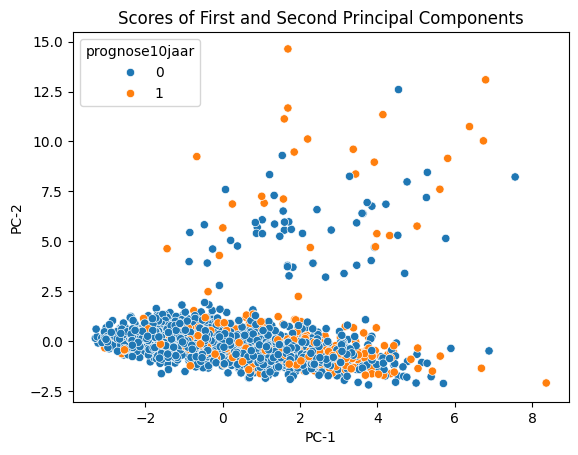

In [198]:
# Create a scatter plot to visualize scores of the first and second principal components
axs = sns.scatterplot(data=data, x="PC-1", y="PC-2", hue="prognose10jaar")

axs.set_title("Scores of First and Second Principal Components")

plt.show()


In [199]:
# from sklearn.cluster import KMeans

# # Create an instance of KMeans with the number of clusters equal to Ngroups
# kmeans = KMeans(n_clusters=Ngroups, n_init=100).fit(scaled)

# # Add a new column "Cluster" to the 'stroke' DataFrame representing the cluster assignments
# data["Cluster"] = pd.Categorical(kmeans.labels_ + 1)   # Adding 1 to cluster labels to start from one



In [200]:
# # Create a scatter plot to visualize the assigned clusters based on the first and second principal components
# axs = sns.scatterplot(data=data, x="PC-1", y="PC-2", hue="Cluster")

# axs.set_title("Assigned Clusters")

# plt.show()


In [201]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    MLPClassifier,
    LogisticRegression,
    SVC,
    RidgeClassifier
]


In [202]:

# Definieer de kenmerken (X) en de target (y)
X = data.drop('prognose10jaar', axis=1)  # Verwijder de 'stroke' kolom om de kenmerken te krijgen
y = data['prognose10jaar']  # Neem alleen de 'stroke' kolom als de target

missing_values = X.isnull().sum()
print("Ontbrekende waarden per kolom:")
print(missing_values)
metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

Ontbrekende waarden per kolom:
geslacht              0
leeftijd              0
opleidingsniveau      0
cigaretten_per_dag    0
slaapscore            0
hypertensie           0
hartinfarct           0
diabetes              0
nierziekte            0
cholesterol           0
bovendruk             0
onderdruk             0
BMI                   0
hartslag              0
glucose               0
PC-1                  0
PC-2                  0
PC-3                  0
PC-4                  0
dtype: int64


/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

,fit_time,score_time,test_score,train_score
DummyClassifier,0.001171,0.000638,0.850309,0.850309
DecisionTreeClassifier,0.015427,0.001825,0.799691,1.000000
LinearDiscriminantAnalysis,0.004383,0.003887,0.865432,0.868519
GaussianNB,0.002859,0.002977,0.830556,0.835494
KNeighborsClassifier,0.002223,0.068237,0.849691,0.879012
RandomForestClassifier,0.371572,0.015645,0.867284,1.000000
AdaBoostClassifier,0.148851,0.008912,0.862963,0.884877
MLPClassifier,0.306537,0.002479,0.830556,0.838580
LogisticRegression,0.020303,0.002438,0.866975,0.869136
SVC,0.033157,0.037599,0.851852,0.852160


In [203]:
# Scheiding van features en target variabele
X = data.drop('prognose10jaar', axis=1)  # Verwijder de 'stroke' kolom om de kenmerken te krijgen
y = data['prognose10jaar']  # Neem alleen de 'stroke' kolom als de target


# Vervang NaN-waarden door het gemiddelde
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling van de trainingsdata met SMOTE met aangepaste k_neighbors
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Voor elk model in de lijst, train het model, maak voorspellingen en evalueer de prestaties
for model_class in models:
    model = model_class()
    model.fit(X_train_smote, y_train_smote)
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Model: {model_class.__name__}")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("\n")


Model: DummyClassifier
Train accuracy: 0.5
Test accuracy: 0.8348765432098766
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       541
           1       0.00      0.00      0.00       107

    accuracy                           0.83       648
   macro avg       0.42      0.50      0.46       648
weighted avg       0.70      0.83      0.76       648



Model: DecisionTreeClassifier
Train accuracy: 1.0
Test accuracy: 0.7577160493827161
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       541
           1       0.32      0.41      0.36       107

    accuracy                           0.76       648
   macro avg       0.60      0.62      0.60       648
weighted avg       0.78      0.76      0.77       648



Model: LinearDiscriminantAnalysis
Train accuracy: 0.7366757000903342
Test accuracy: 0.7191358024691358
Classification Report:
         

/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: KNeighborsClassifier
Train accuracy: 0.8925022583559169
Test accuracy: 0.7052469135802469
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       541
           1       0.30      0.60      0.40       107

    accuracy                           0.71       648
   macro avg       0.60      0.66      0.60       648
weighted avg       0.80      0.71      0.74       648



Model: RandomForestClassifier
Train accuracy: 1.0
Test accuracy: 0.8348765432098766
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       541
           1       0.50      0.39      0.44       107

    accuracy                           0.83       648
   macro avg       0.69      0.66      0.67       648
weighted avg       0.82      0.83      0.83       648





/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Train accuracy: 0.8807588075880759
Test accuracy: 0.8009259259259259
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       541
           1       0.40      0.39      0.39       107

    accuracy                           0.80       648
   macro avg       0.64      0.64      0.64       648
weighted avg       0.80      0.80      0.80       648



Model: MLPClassifier
Train accuracy: 0.7741644083107497
Test accuracy: 0.6620370370370371
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       541
           1       0.29      0.75      0.42       107

    accuracy                           0.66       648
   macro avg       0.61      0.70      0.59       648
weighted avg       0.82      0.66      0.71       648



Model: LogisticRegression
Train accuracy: 0.7371273712737128
Test accuracy: 0.7083333333333334
Classification R

/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: SVC
Train accuracy: 0.7375790424570913
Test accuracy: 0.7067901234567902
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       541
           1       0.33      0.74      0.45       107

    accuracy                           0.71       648
   macro avg       0.63      0.72      0.63       648
weighted avg       0.83      0.71      0.74       648



Model: RidgeClassifier
Train accuracy: 0.7366757000903342
Test accuracy: 0.7191358024691358
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       541
           1       0.33      0.71      0.46       107

    accuracy                           0.72       648
   macro avg       0.63      0.72      0.63       648
weighted avg       0.83      0.72      0.75       648





In [204]:
# Scheiding van features en target variabele
X = data.drop('prognose10jaar', axis=1)  # Verwijder de 'stroke' kolom om de kenmerken te krijgen
y = data['prognose10jaar']  # Neem alleen de 'stroke' kolom als de target

# Vervang NaN-waarden door het gemiddelde
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Voor elk model in de lijst, train het model, maak voorspellingen en evalueer de prestaties
for model_class in models:
    model = model_class()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Model: {model_class.__name__}")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("\n")


Model: DummyClassifier
Train accuracy: 0.8541666666666666
Test accuracy: 0.8348765432098766
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       541
           1       0.00      0.00      0.00       107

    accuracy                           0.83       648
   macro avg       0.42      0.50      0.46       648
weighted avg       0.70      0.83      0.76       648



Model: DecisionTreeClassifier
Train accuracy: 1.0
Test accuracy: 0.7870370370370371
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       541
           1       0.36      0.36      0.36       107

    accuracy                           0.79       648
   macro avg       0.62      0.62      0.62       648
weighted avg       0.79      0.79      0.79       648



Model: LinearDiscriminantAnalysis
Train accuracy: 0.873070987654321
Test accuracy: 0.8472222222222222
Classification Rep

/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: KNeighborsClassifier
Train accuracy: 0.876929012345679
Test accuracy: 0.8487654320987654
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       541
           1       0.61      0.23      0.34       107

    accuracy                           0.85       648
   macro avg       0.74      0.60      0.63       648
weighted avg       0.82      0.85      0.82       648



Model: RandomForestClassifier
Train accuracy: 1.0
Test accuracy: 0.8611111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       541
           1       0.76      0.23      0.36       107

    accuracy                           0.86       648
   macro avg       0.81      0.61      0.64       648
weighted avg       0.85      0.86      0.83       648





/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Train accuracy: 0.8838734567901234
Test accuracy: 0.8410493827160493
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       541
           1       0.55      0.22      0.32       107

    accuracy                           0.84       648
   macro avg       0.70      0.59      0.61       648
weighted avg       0.81      0.84      0.81       648



Model: MLPClassifier
Train accuracy: 0.8804012345679012
Test accuracy: 0.8503086419753086
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       541
           1       0.61      0.26      0.37       107

    accuracy                           0.85       648
   macro avg       0.74      0.61      0.64       648
weighted avg       0.83      0.85      0.82       648



Model: LogisticRegression
Train accuracy: 0.8726851851851852
Test accuracy: 0.8472222222222222
Classification R

/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: SVC
Train accuracy: 0.8560956790123457
Test accuracy: 0.8379629629629629
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       541
           1       1.00      0.02      0.04       107

    accuracy                           0.84       648
   macro avg       0.92      0.51      0.47       648
weighted avg       0.86      0.84      0.77       648



Model: RidgeClassifier
Train accuracy: 0.8649691358024691
Test accuracy: 0.8425925925925926
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       541
           1       0.69      0.08      0.15       107

    accuracy                           0.84       648
   macro avg       0.77      0.54      0.53       648
weighted avg       0.82      0.84      0.79       648





In [205]:
# Scheiding van features en target variabele
X = data.drop('prognose10jaar', axis=1)
y = data['prognose10jaar']

# Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training zonder oversampling
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Voorspellingen op de testset
y_pred = model.predict(X_test)

# Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test accuracy: 0.8580246913580247

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       541
           1       0.73      0.22      0.34       107

    accuracy                           0.86       648
   macro avg       0.80      0.60      0.63       648
weighted avg       0.84      0.86      0.83       648



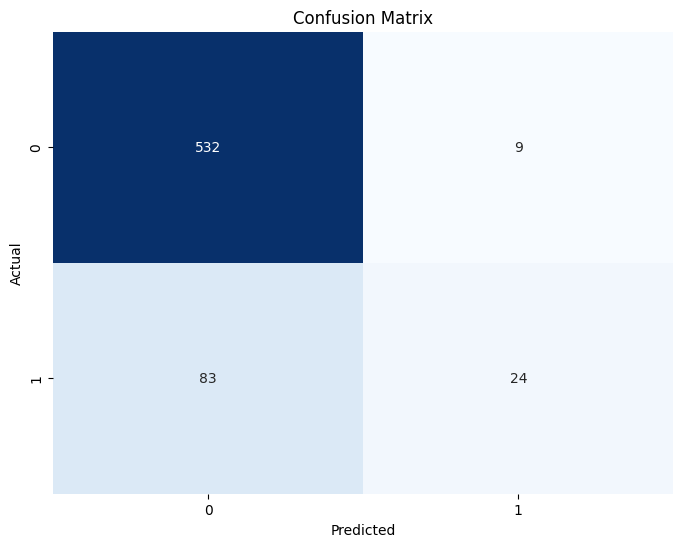

In [206]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [207]:
# # Definieer de hyperparameters grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Grid search cross-validation
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters found
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# # Retrain model with best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train_smote, y_train_smote)

# # Predictions and evaluation
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test accuracy with best parameters:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


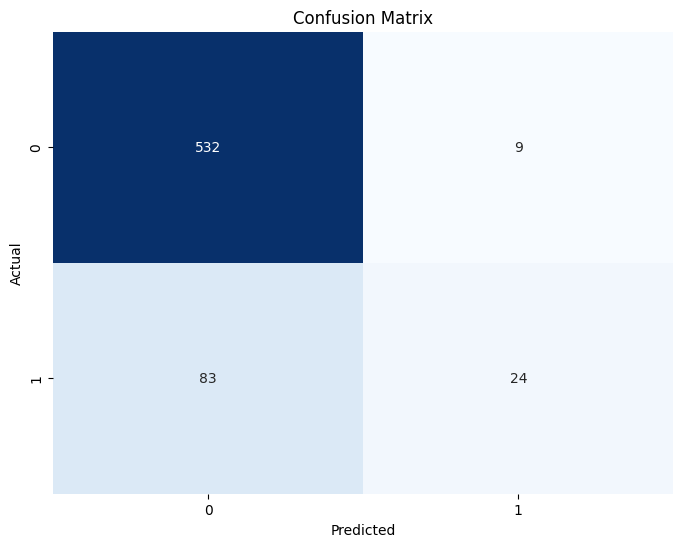

In [208]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [224]:
# Model training zonder SMOTE
model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Voorspellingen op de testset
y_pred = model.predict(X_test)

# Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import pickle
 
with open('./kerstboom.pkl', 'wb') as filehandle:
    pickle.dump(model, filehandle)


Test accuracy: 0.8626543209876543

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       541
           1       0.80      0.22      0.35       107

    accuracy                           0.86       648
   macro avg       0.83      0.61      0.64       648
weighted avg       0.85      0.86      0.83       648



In [210]:
data

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar,PC-1,PC-2,PC-3,PC-4
0,0,39,0,30.0,62,0,0,0,0.0,236.465604,122.5,80.0,18.0,105.0,81.816604,0,-1.290186,-0.143033,0.587842,-2.732285
1,1,60,3,0.0,39,0,0,0,0.0,250.000000,133.0,89.5,27.0,90.0,81.816604,0,0.592963,0.024485,0.195575,0.100445
2,1,42,1,0.0,41,0,0,0,0.0,274.000000,121.0,61.5,25.0,80.0,76.000000,0,-1.415728,0.285225,-0.049372,0.379733
3,1,41,0,20.0,68,0,0,0,0.0,234.000000,103.0,71.0,21.0,68.0,82.000000,1,-2.241132,0.111104,1.092544,0.487546
4,0,50,2,0.0,38,0,0,0,0.0,309.000000,136.0,90.0,26.0,70.0,75.000000,0,0.373108,-0.136417,-1.314816,0.278329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0,38,0,30.0,71,0,0,0,0.0,164.000000,113.0,68.0,25.0,70.0,75.000000,0,-2.339705,-0.209640,0.769297,-0.536358
3236,0,32,2,15.0,64,0,0,0,0.0,199.000000,116.0,81.0,21.0,75.0,93.000000,0,-1.944081,0.239919,0.377231,-1.386921
3237,0,46,2,0.0,18,1,0,0,0.0,237.000000,196.0,120.0,31.0,58.0,60.000000,1,3.689745,-1.710614,-0.265633,0.833908
3238,0,58,0,0.0,78,0,0,0,0.0,205.000000,142.5,74.5,25.0,85.0,83.000000,0,-0.082577,0.203874,-1.321164,-0.553091


In [211]:
param_grid=dict()
param_grid['solver']=['svd', 'lsqr', 'eigen']
param_grid['n_components']=[None, 10, 20, 30, 40, 1000]
 
# Grid search cross-validation
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
 
# Best parameters found
best_params = grid_search.best_params_
print("Best parameters:", best_params)
 
# Retrain model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best parameters:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'n_components': None, 'solver': 'svd'}
Test accuracy with best parameters: 0.8472222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       541
           1       0.59      0.24      0.34       107

    accuracy                           0.85       648
   macro avg       0.73      0.60      0.63       648
weighted avg       0.82      0.85      0.82       648



/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/homes/jrgommers/periode_3/stroke/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/homes/jrgommers/periode_3/stroke/lib/python3.11/sit

In [12]:
from __init__ import model_factory

new_model = model_factory()
new_model.predict('data/competition-train-noclass.csv')

c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha

['CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD+',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 'CHD-',
 

In [213]:
# import pandas as pd

# train = pd.read_csv("competition-train.csv")

In [214]:
# train.dtypes
# train["prognose10jaar"] = train["prognose10jaar"].astype('category') 


In [215]:
# from sklearn.dummy import DummyClassifier

# X = train.iloc[:, :-1].to_numpy()
# y = train.iloc[:, -1].to_numpy()

# X,y 

# model = DummyClassifier()
# model.fit(X,y)



In [216]:
# import pandas as pd

# test = pd.read_csv("competition-train-noclass.csv")

# test.dtypes
# test["prognose10jaar"] = test["prognose10jaar"].astype('category') 


In [217]:
# X_pred = test.iloc[:, :-1].to_numpy()
# y_pred = model.predict(X_pred)

# y_pred

In [218]:
# import pickle

# # Model opslaan
# with open ('./model.pkl, wb') as filehandle:
#     pickle.dump(model, filehandle)

In [219]:
# with open ('./model.pkl, wb') as filehandle:
#     new_model = pickle.load(filehandle)

In [220]:
# class dummy():
#     def predict(self,filename):
#         filename = "competition-train-noclass.csv"
#         test = pd.read_csv(filename)
#         test.dtypes
#         test["prognose10jaar"] = test["prognose10jaar"].astype('category')

#         x = test.iloc[:, :-1]

#     with open ('./model.pkl, wb') as filehandle:
#         new_model = pickle.load(filehandle)

#     yhat = new_model.predict(x)

In [221]:
# #__nt__.py

# # hier vertel ik iets over mijn module en groepsnaam

# def model_factory():

#     return dummy

In [222]:
# from les3 import model_factory
# package_model = model_factory()